In [1]:
import qiskit 
from qiskit import QuantumCircuit


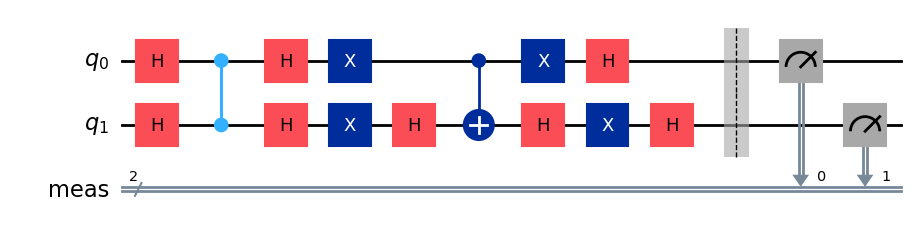

In [2]:
from qiskit import QuantumCircuit
# fungsi oracle untuk menandai target
def oracle(circuit):
    circuit.cz(0,1) # menggunakan controllled-z gate untuk menandai elemen '11'
    
# fungsi diffusion operator (Amplitude Implification)
def diffuser (circuit, n):
    circuit.h(range(n))
    circuit.x(range(n))
    circuit.h(n-1)
    circuit.mcx(list(range(n-1)), n-1)
    circuit.h(n-1)
    circuit.x(range(n))
    circuit.h(range(n))
    
# jumlah qubit
n_qubits = 2 
grover_circuit = QuantumCircuit(n_qubits)

# inisialisasi superposisi 
grover_circuit.h(range(n_qubits))

# 2.oracle
oracle(grover_circuit)

# 3. diffuser 
diffuser(grover_circuit, n_qubits)

# 4. pengukuran 
grover_circuit.measure_all()


# eksekusi circuit pada simulator
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()

from qiskit import transpile
new = transpile(grover_circuit, aer_sim)
job = aer_sim.run(new)

result = job.result()
counts = result.get_counts()

grover_circuit.draw('mpl')


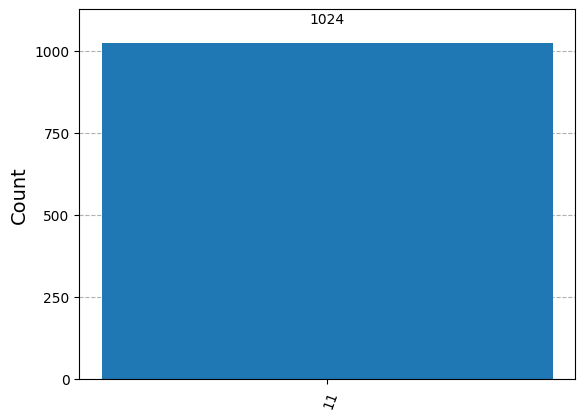

In [3]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [22]:
counts

{'11': 1024}

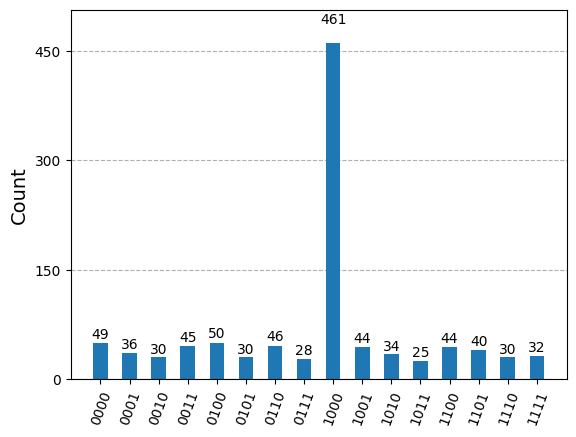

In [47]:
    from qiskit import QuantumCircuit
    def oracle(circuit):
        circuit.x(range(3))    # Membalikkan qubit 0, 1, 2 untuk membuat keadaan 1000 unik
        circuit.h(3)           # Mengubah qubit ke-3 menjadi superposisi
        circuit.mcx([0, 1, 2], 3)  # Multi-controlled X gate
        circuit.h(3)           # Kembali dari superposisi
        circuit.x(range(3))    # Kembalikan qubit 0, 1, 2 ke keadaan semula

        
    # fungsi diffusion operator (Amplitude Implification)
    def diffuser (circuit, n):
        circuit.h(range(n))
        circuit.x(range(n))
        circuit.h(n-1)
        circuit.mcx(list(range(n-1)), n-1)
        circuit.h(n-1)
        circuit.x(range(n))
        circuit.h(range(n))
        
    # jumlah qubit
    n_qubits = 4 
    grover_circuit = QuantumCircuit(n_qubits)

    # inisialisasi superposisi 
    grover_circuit.h(range(n_qubits))

    # 2.oracle
    oracle(grover_circuit)

    # 3. diffuser 
    diffuser(grover_circuit, n_qubits)

    # 4. pengukuran 
    grover_circuit.measure_all()


    # eksekusi circuit pada simulator
    from qiskit_aer import AerSimulator
    aer_sim = AerSimulator()

    from qiskit import transpile
    new = transpile(grover_circuit, aer_sim)
    job = aer_sim.run(new)

    result = job.result()
    counts = result.get_counts()

    from qiskit.visualization import plot_histogram
    plot_histogram(counts)

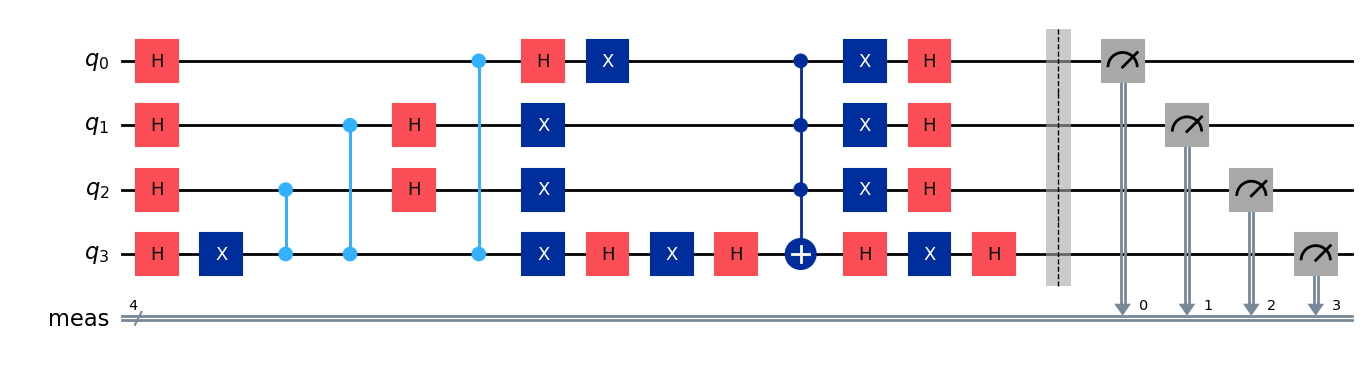

In [36]:
grover_circuit.draw('mpl')


In [43]:
counts

{'0001': 276, '0010': 258, '0111': 240, '0100': 250}

In [ ]:
token = "3665514b910258010b1aaf014078f35e84a325e8457652dcde4780f8e201c816742b57afc7741ec9028bce6e4945cf5862a1e7590261236c8dab099911405c77"